In [5]:
pip install --upgrade certifi

Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array

In [5]:
# image settings
IMG_SIZE = (224, 224)
BATCH_SIZE = 16

In [6]:
train_datagens = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    rotation_range=10
)

train_data = train_datagens.flow_from_directory(
    "../clothes_dataset",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_data = train_datagens.flow_from_directory(
    "../clothes_dataset",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 110 images belonging to 5 classes.
Found 23 images belonging to 5 classes.


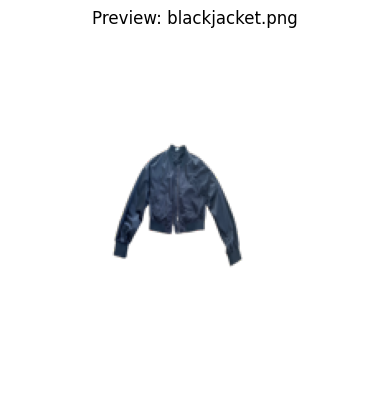

In [ ]:
# load_img switched to direct PIL to preview image
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load and resize the image using PIL
img = Image.open("../clothes_dataset/casual/blackjacket.png").resize((224, 224))

# Convert to array and normalize
img_array = np.array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Preview
plt.imshow(img)
plt.title("Preview: blackjacket.png")
plt.axis("off")
plt.show()



In [1]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models

IMG_SIZE = (224, 224)

base_model = EfficientNetB0(
    input_shape=IMG_SIZE + (3,),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False

In [7]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(train_data.num_classes, activation='softmax')
])

In [8]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
history = model.fit(
    train_data,
    epochs=5,
    validation_data=val_data
)

Epoch 1/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 864ms/step - accuracy: 0.3418 - loss: 1.5257 - val_accuracy: 0.3913 - val_loss: 1.5007
Epoch 2/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 707ms/step - accuracy: 0.2433 - loss: 1.5776 - val_accuracy: 0.3913 - val_loss: 1.5100
Epoch 3/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 711ms/step - accuracy: 0.3537 - loss: 1.5765 - val_accuracy: 0.3913 - val_loss: 1.4972
Epoch 4/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 707ms/step - accuracy: 0.3371 - loss: 1.5208 - val_accuracy: 0.3913 - val_loss: 1.4968
Epoch 5/5
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 689ms/step - accuracy: 0.3185 - loss: 1.5831 - val_accuracy: 0.3913 - val_loss: 1.4998


In [11]:
base_model.trainable = True
for layer in base_model.layers[:-20]:
    layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history2 = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.1735 - loss: 1.6229 - val_accuracy: 0.3913 - val_loss: 1.4990
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 716ms/step - accuracy: 0.3135 - loss: 1.6103 - val_accuracy: 0.3913 - val_loss: 1.4982
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 712ms/step - accuracy: 0.3029 - loss: 1.5864 - val_accuracy: 0.3913 - val_loss: 1.4977
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 703ms/step - accuracy: 0.3817 - loss: 1.5495 - val_accuracy: 0.3913 - val_loss: 1.4972
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 702ms/step - accuracy: 0.2692 - loss: 1.6034 - val_accuracy: 0.3913 - val_loss: 1.4969
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 722ms/step - accuracy: 0.2391 - loss: 1.6144 - val_accuracy: 0.3913 - val_loss: 1.4967
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 740ms/step - accuracy: 0.3257 - loss: 1.5985 - val_accuracy: 0.3913 - val_loss: 1.4966
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 733ms/step - accuracy: 0.2761 - loss: 1.5745 - val_accuracy: 0.3913 - val_loss: 1